# Naive Bayes
##Prerequisites:
Familiarity with:

* Fundamentals of Probability
* Evaluation metrics for classification


##Learning Objective:
* Discuss the differences between discriminative and generative learning algorithms.
* Recall conditional probabilty and Bayes theorem.
* Explain Naive Bayes Classifier.
* Discuss the types of Naive Bayes.
* Apply naive bayes to solve classification tasks in Python with scikit-learn.

In previous chapters, we learned about different classifiers that try to learn the mapping from the input features directly to the target output. For example: logistic regression, decision trees, neural networks and so on. These types of classifiers are known as **discriminative classifiers**. However, there are other classifiers known as generative classifiers that function differently. In this unit, we will be talking about one such generative algorithm named Naive Bayes. But, before we start, let's learn the differences between discriminative and generative classifiers. We will be using an example of fruit classifier to differentiate them. The fruit classifier classifies a fruit as either an apple or an orange.


## Discriminative Approach

Discriminative classifiers use the input features and the corresponding labels in the training set to learn a **decision boundary** that separates the apples and the oranges. Then for a new fruit, it sees which side of the decision boundary the fruit falls in and predicts accordingly. As you can see, learning the decision boundary is analogous to learning the mapping directly from input features to the output class.

<figure align="center">
       <img src="https://drive.google.com/uc?export=view&id=1JH0O7eZ7gI9RcJc-KdB59Wqf9Kaq8vSy" height="250px">
       <figcaption>Figure 1: Discriminative Model</figcaption>
</figure>








## Generative Approach


Let’s try a different approach. This time we won't be learning the direct mapping. Instead, we will use the input features belonging to a particular class to learn a **model** for that class. These models represent what a sample belonging to that class looks like. First, looking at the apples, we can learn a model of what the apples look like based on their features. Then, looking at the oranges, we can build a separate model of what the oranges look like based on their features. For a new fruit, we compare it with both: the apple's model as well as the orange's model. We then predict the fruit as a apple if it is more similar to the apple's model or as a orange if it is more similar to the orange's model.

<figure align="center">
       <img src="https://drive.google.com/uc?export=view&id=1NzXBKn63z58-mTq9JrNZ3G46mmEkXDfK" height="250px">
       <figcaption>Figure 2: Generative Model</figcaption>
   </figure>


We can also use the learned model of a class to generate new samples belonging to that class. So these types of models are known as **generative models**. Naive Bayes is an example of such model.



Before diving into Naive Bayes, let's recall the basic concepts of **conditional probability** and **Bayes theorem**

## Conditional Probability

The conditional probability of an event is the probability of that event occurring given that another event has occurred. Suppose there are two events $A$ and $B$. Then the probability of occurrence of event $A$ given the event $B$ has already occurred is denoted as $P(A|B)$ and defined as:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$
where $P (A\cap B) $ is the probability of both the events $A$ and $B$ occurring.
  
Note: If the event $A$ is **independent** of event $B$ i.e. the probability of event $A$ is not affected by the event $B$ then $P(A|B) = P(A)$.




**Example**

Let's consider an example. Its monsoon season this time of the year and the probability of raining today is 0.8. Its a weekday, you are working from home so the probability of you going out today is very low, say 0.4. Suppose, the probability of both the events happening *i.e.* raining and you going out is 0.2. What is the probability of you going out given it is raining?

Here,

$P(\text{rain}) = 0.8$

$P(\text{out}) = 0.4$

$P(\text{rain} \cap \text{out}) = 0.2$

$P(\text{out}|  \text{rain}) = \frac{P(\text{rain} \cap \text{out})}{P(\text{rain})} = \frac{0.2}{0.8} = 0.25$

Thus, the probability of you going out given it is raining is 25\%. That means you are less likely to go out if it's raining already.

## Bayes Theorem

Bayes theorem is an extremely powerful theorem in the field of statistics. It is used to find the probability of a hypothesis given its evidence.

According to the Bayes Theorem,<br>
$$P(H|E) = \frac{P(E|H)\ P(H)}{P(E)}$$<br>
where,
* H is the **Hypothesis**,
* E is the **Evidence/Data** that supports our hypothesis,
* $P(H|E)$ is the **posterior probability** of Hypothesis given Evidence,
* $P(H)$ is the **prior** probability of the hypothesis,
* $P(E)$ is the probability of evidence,
* $P(E|H)$ is the conditional probability (likelihood) of Evidence given Hypothesis.






**Example**
Suppose you are feeling unwell. You search the web and find out that your symptoms match that of a rare disease called Dragon Skin. This disease causes the skin of the patient to be scaled like dragons! You hypothesize that you are suffering from the disease. Here the **hypothesis $(H)$ is that you are suffering from dragon skin and the symptoms are the evidence $(E)$ that supports your hypothesis.**



You search the web about the dragon skin and come up with the following facts:

1. 95 % people show symptoms as yours provided they have dragon skin *ie.* $P(E| H) = 0.95$
2. Only 1 among hundred thousand people suffer from dragon skin *ie.* $P(H) = 0.00001$
3. The symptoms you have are pretty common like fever and nausea which happens to 1 in every 100 people ie. $P(E) = 0.01$


After knowing all the facts, you use Bayes Theorem to calculate the probability that you are suffering from dragon skin given the symptoms.

$P(H|E) = \frac{P(E|H)P(H)}{P(E)}= \frac{0.95 * 0.00001}{0.01} = 0.00095 = 0.95\%$

Hence, there is a very low probability that you are suffering from dragon skin. So you breathe a sigh of relief!

## Naive Bayes Classifier

You just learned how Bayes Theorem can be used to calculate the probability of a hypothesis being true given its evidence. The same concept can be used to solve the classification problem. In a classification problem, Bayes' theorem can compute the probability that a particular sample falls in a particular class $y$ given it's set of features $x_1, x_2 ... x_i ... x_n$.

Relating to the terms in Bayes Theorem, the **hypothesis is that the sample belongs to a particular class and the evidence is the sample's features.** Similarly,

$P(H) = P(y)$

$P(E) = P(x_1, x_2 ... x_i ... x_n)$

$P(E|H) = P(x_1, x_2 ... x_i ... x_n|y)$

$P(H|E) = P(y|x_1, x_2 ... x_i ... x_n)$

Using Bayes Theorem, for each class $y \in \{0,1,2....... k\}$, we calculate $P(H|E)$ *ie.*

$$P(y|x_1, x_2 ... x_i ... x_n) = \frac{P(x_1, x_2 ... x_i ... x_n|y) \ P(y)}{P(x_1, x_2 ... x_i ... x_n)} \ ........(1)$$

\

We can write the above expression in a simpler form as:

$$P(\text{class}|\text{features})=\frac{P(\text{features}|\text{class}) \ P(\text{class})}{P(\text{features})}$$

Here the probability of having some features given a particular class ie. $P(\text{features|class})$ acts as the model for that class using which we calculate $P(\text{class|features})$.




### The Naive Assumption

You might be thinking why is the Naive Bayes classifier called 'naive'? Well it is because of the assumption it makes. It assumes that each feature is independent of the other features. This is a naive assumption that is almost never true in reality.

An example would be a model to predict whether or not it will rain tomorrow. Suppose the features we use are humidity and cloud coverage. Naive Bayes assumes that the humidity does not depend on cloud coverage and vice versa. This is a pretty big, and often false, assumption. **This is why it is called naive.**

When the events are independent of each other, their joint probabilities can be calculated as the product of the probabilities of individual events. As a consequence of this naive assumption, $P(x_1, x_2 ... x_i ... x_n|y)$ can be written as:

$$P(x_1, x_2 ... x_i ... x_n|y) = \prod_i^n P(x_i|y) \ .........(2)$$






### Prediction

We then predict the $\text{class}$ that has the highest value of $P(\text{class}|\text{features})$ *ie.*

$$\hat{y} = \operatorname{arg}\underset{y}{\operatorname{max}}\ P(y|x_1, x_2 ... x_i ... x_n)$$

\

From $(1)$ and $(2)$ we can write,

$$\hat{y}=\operatorname{arg}\underset{y}{\operatorname{max}}\  \frac{\prod_i^n P(x_i|y) \ P(y)}{P(x_1, x_2 ... x_i ... x_n)}$$

\

When comparing across multiple classes, the denominator $P(x_1, x_2 ... x_i ... x_n)$ is a constant term. So Naive Bayes can be written in a more succinct form as:

$$\hat{y} = \operatorname{arg}\underset{y}{\operatorname{max}}\  \prod_i^n P(x_i|y) \ P(y)$$


Hence, Naive Bayes predicts a sample to belong to the class that maximizes the product of probability of getting the sample's features given that class and the prior probability of that class.

**Example: A Simple Naive Bayes Classifier**
Let’s understand how Naive Bayes can be used for classification using an example. Consider a classification problem where the input is an SMS message and the output is a binary label classifying the message as spam or not spam.

A simple approach would be to see if some words appears in the message at least once, and classify the message based on that. The two most common words that appear frequently in spam messages are "discount" and "cheap". But then it is not necessary for all the spam messages to contain both the words: some might not contain the word "discount", some might not contain the word "cheap" and some might not contain both.  It is also not necessary for all the messages that do contain these words to be spam.

Suppose that there are 1000 messages in the train set, of which 400 are spam and the others are not. 300 of the 400 spam messages contain the word "discount" in them and 260 of them contain the word "cheap" in them. Also 90 of the 600 non-spam messages contain the word "discount" and 114 of them contain the word "cheap" in them.





Let $S$ be an event of a message being spam and $\bar{S}$ be an event of a message being non-spam. Similary, let $D$ be the event of the word 'Discount' appearing in a message and $C$ be the event of the word "cheap" appearing in a message.

Then,

Probability of getting a spam message, $P(S) = \frac{400}{1000} = 0.4$

Probability of getting a non-spam message, $P(\bar{S}) = \frac{600}{1000} = 0.6$

Probability of getting the word "discount" in a spam message, $P(D|S) = \frac{300}{400} = 0.75$

Probability of getting the word "cheap" in a spam message, $P(C|S) = \frac{260}{400} = 0.65$

Probability of getting the word "discount" in a non-spam message, $P(D|\bar{S}) = \frac{90}{600} = 0.15$

Probability of getting the word "cheap" in a non-spam message, $P(C|\bar{S}) = \frac{114}{600} = 0.19$

Consider a test SMS containing the words "discount" and "free",

For class **spam**,
$$P(D,C|S)P(S) = P(D|S) \times P(C|S) \times P(S) = 0.75 \times 0.65 \times 0.4 = 0.195$$.

For class **non-spam**,
$$P(D,C|\bar{S})P(\bar{S}) = P(D|\bar{S}) \times P(C|\bar{S}) \times P(\bar{S}) = 0.15 \times 0.19 \times 0.6 = 0.0171$$

\
Since $0.195 \gt 0.0171$, the SMS is spam

\

**Note:** According to the naive assumption, the fact that a message contains the word "cheap" does not influence the probability of it having the word "discount" and vice versa. In the real world, a spam message containing the word "discount" has higher chances of having the word "cheap" too. As a consequence of this assumption we could write $P(D,C|S)$ as $P(D|S) \times P(C|S)$

### Types of Naive Bayes

We know that the Naive Bayes learns a model for each class as $P(\text{features|class})$. Learning this model depends on the type of the features present in the dataset. There are different types of features: some have continuous values, some have binary 0/1 values, some have values that represent count or frequency and so on. Based on the type of the features, we have several variants of Naive Bayes. Here we will discuss the three most popular variants of Naive Bayes classifier.

* **Gaussian Naive Bayes:** Gaussian Naive Bayes is used when the features of our data can take continuous values. For example, Gaussian NB works really well on the Iris problem, where the input features are continuous values representing the width and length of sepals and petals.<br>
You can implement the Gaussian Naive Bayes using [`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) class from `scikit-learn`.


* **Bernoulli Naive Bayes:** Bernoulli Naive Bayes is used when the features of our data can take binary values *ie.* 0 or 1.  For example Bernoulli NB works really well with the spam classification problem discussed above, where the model looks at whether certain words appear in the SMS (1) or not (0), but not the number of times the words appear. <br>
 You can implement the Bernoulli Naive Bayes using [`sklearn.naive_bayes.BernoulliNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) class from `scikit-learn`.

*  **Multinomial Naive Bayes:** Multinomial Naive Bayes is used when the values of features of our dataset take on discrete values and represent the frequency or count of the number of times an event occurred. For example, you would use multinomial NB in the spam classification problem, where the model looks at not just if some words appear in the message, but how many times they appear as well.<br>
You can implement the Multinomial Naive Bayes using [`sklearn.naive_bayes.MultinomialNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) class from `scikit-learn`.






## Iris Flower Classification

Now that you have learned about theory behind Naive Bayes Classifier, let's implement it on a real-world problem using scikit-learn. In this section, you will implement Naive Bayes classifier on the [Iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). We have been using the Iris dataset for quite a while now. We will use the same dataset here as well. The problem is to classify the samples of iris plant into 3 types of species.

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

Let's load the iris dataset using the [`load_iris`](https://scikit-learn.org/0.16/modules/generated/sklearn.datasets.load_iris.html) function from `sklearn`.

In [2]:
# Import iris dataset from sklearn.datasets
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target
class_names = iris.target_names

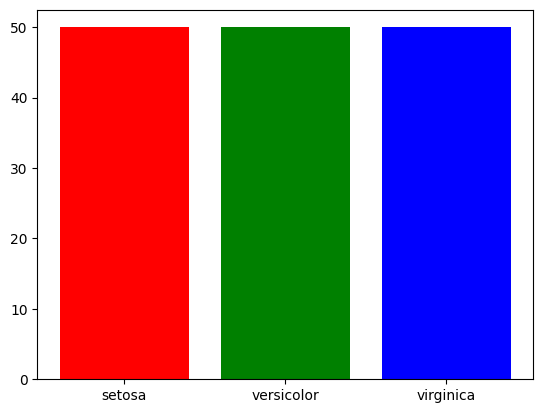

In [3]:
_, counts_elements = np.unique(y, return_counts=True)
plt.bar(class_names, counts_elements, color=['r', 'g', 'b'])
plt.show()

We can see that the dataset has equal number of instances from each class.

**Splitting the dataset into training set and test set**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### Fitting the Gaussian Naive Bayes classifier

Now we will fit the Gaussian Naive Bayes Classifier to our training set. You might ask why Gaussian Naive Bayes? Why not Multinomial Naive Bayes or the Bernoulli Naive Bayes. Well, if you recall, whenever the features have continuous values we use the **Gaussian Naive Bayes**.

You can import the [`GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) from `sklearn.naive_bayes` and fit it directly on your training set.




In [5]:
from sklearn.naive_bayes import GaussianNB

gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)

GaussianNB()

When we train the Gaussian Naive Bayes, it learns the prior $P(\text{class})$ for each class and the likelihood $P(\text{features|class})$ for each feature and class. Learning the prior $P(\text{class})$ is pretty simple. It is the percentage of a class in the training set. For example, $P(\textrm{Setosa}) = \frac{{number\phantom{.}of \phantom{.}\textrm{Setosa}\phantom{.} samples}}{total\phantom{.}number \phantom{.} of\phantom{.}samples}$.

Similarly, to learn the likelihood $P(\text{features|class})$, it learns the probability distribution of each feature for each class. Learning to compute the likelihood is beyond the scope of this reading material (we rely on sklearn to do this job for now), but we will show the plots of the probability distribution of each feature for each class in the iris dataset and discuss the intuition on how naive bayes uses it.

The following block of code plots the probability distribution of each feature for the corresponding class.

In [6]:
# Features of each particular class
X_setosa = X_train[y_train == 0]
X_versicolor = X_train[y_train == 1]
X_virginica = X_train[y_train == 2]

# List of features
features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']

In [7]:
import math
import scipy.stats as stats

# Function to plot the probability distribution
def plot_distribution(ax, x, label):
    mean = x.mean()
    sigma = x.std()
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    ax.plot(x, stats.norm.pdf(x, mean, sigma), label = label)
    ax.legend()
    ax.set_xlabel('x')

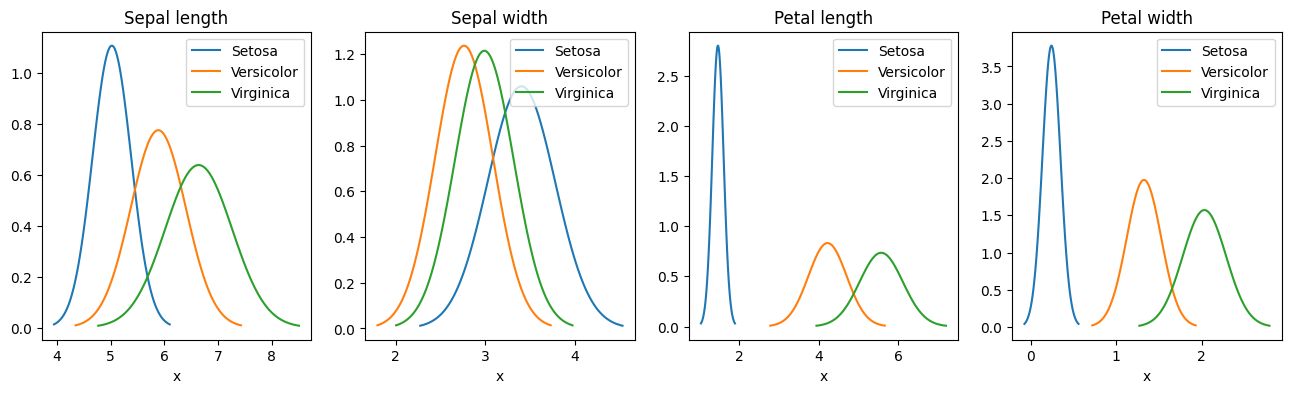

In [8]:
# Creating subplots
fig, ax = plt.subplots(ncols=4, figsize=(16,4))

# Plotting the probability distribution of each feature for the corresponding class
for i in range(len(features)):
  plot_distribution(ax[i], X_setosa[:,i], 'Setosa')
  plot_distribution(ax[i], X_versicolor[:,i], 'Versicolor')
  plot_distribution(ax[i], X_virginica[:,i], 'Virginica')
  ax[i].set_title(features[i])

Let's look at the probability distribution of **Petal width** to discuss what these distributions actually mean. You can see that the flowers with petal width 0.1cm to 0.5cm have higher probability of belonging to the species Setosa. Similarly, the flowers with petal width 1cm to 1.6cm have higher probability of belonging to the species Versicolor and the flowers with petal width 1.8cm to higher have higher probability of belonging to the species Virginica. From the above plots, we can see that the two features **Petal length** and **Petal width** are very helpful to categorize the flowers. However, Gaussian Naive Bayes uses the probability distributions of all the four features to learn the likelihood $P(\text{features|class})$.

### Making Predictions

Now that we have trained the model, let's make some predictions on the test set. We can use the [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict_proba) method of `GaussianNB` object to predict the posterior probability *ie.* $P(y|x_1,x_2,...,x_n)$ for each class $y\in\{0,1,2\}$ for the test set.

In [9]:
y_pred = gaussian_nb.predict_proba(X_test)
pd.DataFrame(y_pred, columns=['P(y=0|X)','P(y=1|X)', 'P(y=2|X)']).head(5)

,P(y=0|X),P(y=1|X),P(y=2|X)
0,1.633808e-232,2.188784e-06,9.999978e-01
1,1.826404e-82,9.999983e-01,1.696184e-06
2,1.000000e+00,7.102505e-19,3.654498e-28
3,1.585083e-305,1.046490e-06,9.999990e-01
4,1.000000e+00,8.591687e-17,4.221594e-27


We can use the [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB.predict) method of `GaussianNB` object to directly predict the class for the test set.

In [10]:
y_pred = gaussian_nb.predict(X_test)
pd.DataFrame(y_pred, columns=['Predicted Class']).head()

,Predicted Class
0,2
1,1
2,0
3,2
4,0


As you can see, the `gaussian_nb` is actually predicting the class with the highest posterior probability. For example, the first test sample has the highest posterior probability for class 2. So the sample is predicted as class 2 *ie.* virginica.

### Model Evaluation

After fitting our model, its time to evaluate the model's performance on unseen data. We will evaluate the model's performance on the test set.






#### Accuracy

Let's compute the accuracy of our classifier using [`accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function from `sklearn`.

In [11]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score

accuracy =  accuracy_score(y_test, y_pred)
print('Accuracy= ',accuracy)

Accuracy=  0.9666666666666667


Wow! the model has a pretty good accuracy of 0.9666 meaning 96.6% of its predictions are correct. And also the classes are not skewed which suggests that the model is actually performing very good. Infact if you recall the accuracy of the previous discriminative classifiers on iris dataset, the performance of Naive Bayes is better than that of logistic regression and  decision tree and is on par with that of Neural Network. Also keep in mind that the Neural Network is far more computationally expensive than the Naive Bayes classifier.




#### Confusion Matrix

Let's see how the confusion matrix of our classifier looks like using the [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) function from `sklearn`.

In [12]:
# Import plot_confusion matrix from sklearn
from sklearn.metrics import plot_confusion_matrix

classes = ['Setosa', 'Versicolor', 'Virginica']
disp = plot_confusion_matrix(gaussian_nb,X_test,y_test, display_labels=classes)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

We can see that the classifier misclassified a sample of virginica as versicolor. Except from that the classifier has perfectly classified the samples in the test set.

## Additional Resources:

* Lecture Notes from Stanford CS229: Machine Learning
   * Andrew Ng, Generative Learning Algorithms
   
   http://cs229.stanford.edu/notes/cs229-notes2.pdf
       * Introduction to Generative learning algorithms, Page 1 and 2 to learn about generative and discriminative models

* Books
  * Christopher D. Manning, Prabhakar Raghavan, Hinrich Schütze, [An Introduction to Information Retrieval](https://nlp.stanford.edu/IR-book/pdf/irbookonlinereading.pdf), Cambridge UP
    * Chapter 13, Text Classification and Naive Bayes, Page 256-261 to learn about the use of Multinomial Naive Bayes in text classification in greater detail.

  * Jake VanderPlas, Python Data Science Handbook, O'Reilly
    * Chapter 5.05, In Depth: Naive Bayes Classification, [When to use Naive Bayes](https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html#When-to-Use-Naive-Bayes)


    







